In [2]:
!pip install ultralytics

In [ ]:
/content/drive/MyDrive/YOLO-football

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from ultralytics import YOLO

In [4]:
!mkdir /content/drive/MyDrive/YOLO-football/datasets

mkdir: cannot create directory ‘/content/drive/MyDrive/YOLO-football/datasets’: File exists


In [5]:
%cd /content/drive/MyDrive/YOLO-football/datasets

/content/drive/MyDrive/YOLO-football/datasets


In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="uLWwvVGnmQ0Q2vIGMpRD")
project = rf.workspace("practice-uvcxz").project("football-players-detection-ngpgq")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.36, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Football-players-detection-1 in yolov8:: 100%|██████████| 160/160 [00:01<00:00, 151.02it/s]


In [7]:
# Training the model
%cd /content/drive/MyDrive/YOLO-football
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True


/content/drive/MyDrive/YOLO-football
100% 21.5M/21.5M [00:00<00:00, 180MB/s]
Ultralytics YOLOv8.1.36 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/YOLO-football/datasets/Football-players-detection-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fals

In [8]:
!ls /content/drive/MyDrive/YOLO-football/runs/detect/train


args.yaml					    P_curve.png		train_batch161.jpg
confusion_matrix_normalized.png			    PR_curve.png	train_batch162.jpg
confusion_matrix.png				    R_curve.png		train_batch1.jpg
events.out.tfevents.1711647767.5211962cbec7.5070.0  results.csv		train_batch2.jpg
F1_curve.png					    results.png		val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	val_batch0_pred.jpg
labels.jpg					    train_batch160.jpg	weights


In [11]:
#Method 1 to open image
# from PIL import Image
# Image.open('/content/drive/MyDrive/YOLO-football/runs/detect/train/confusion_matrix_normalized.png')

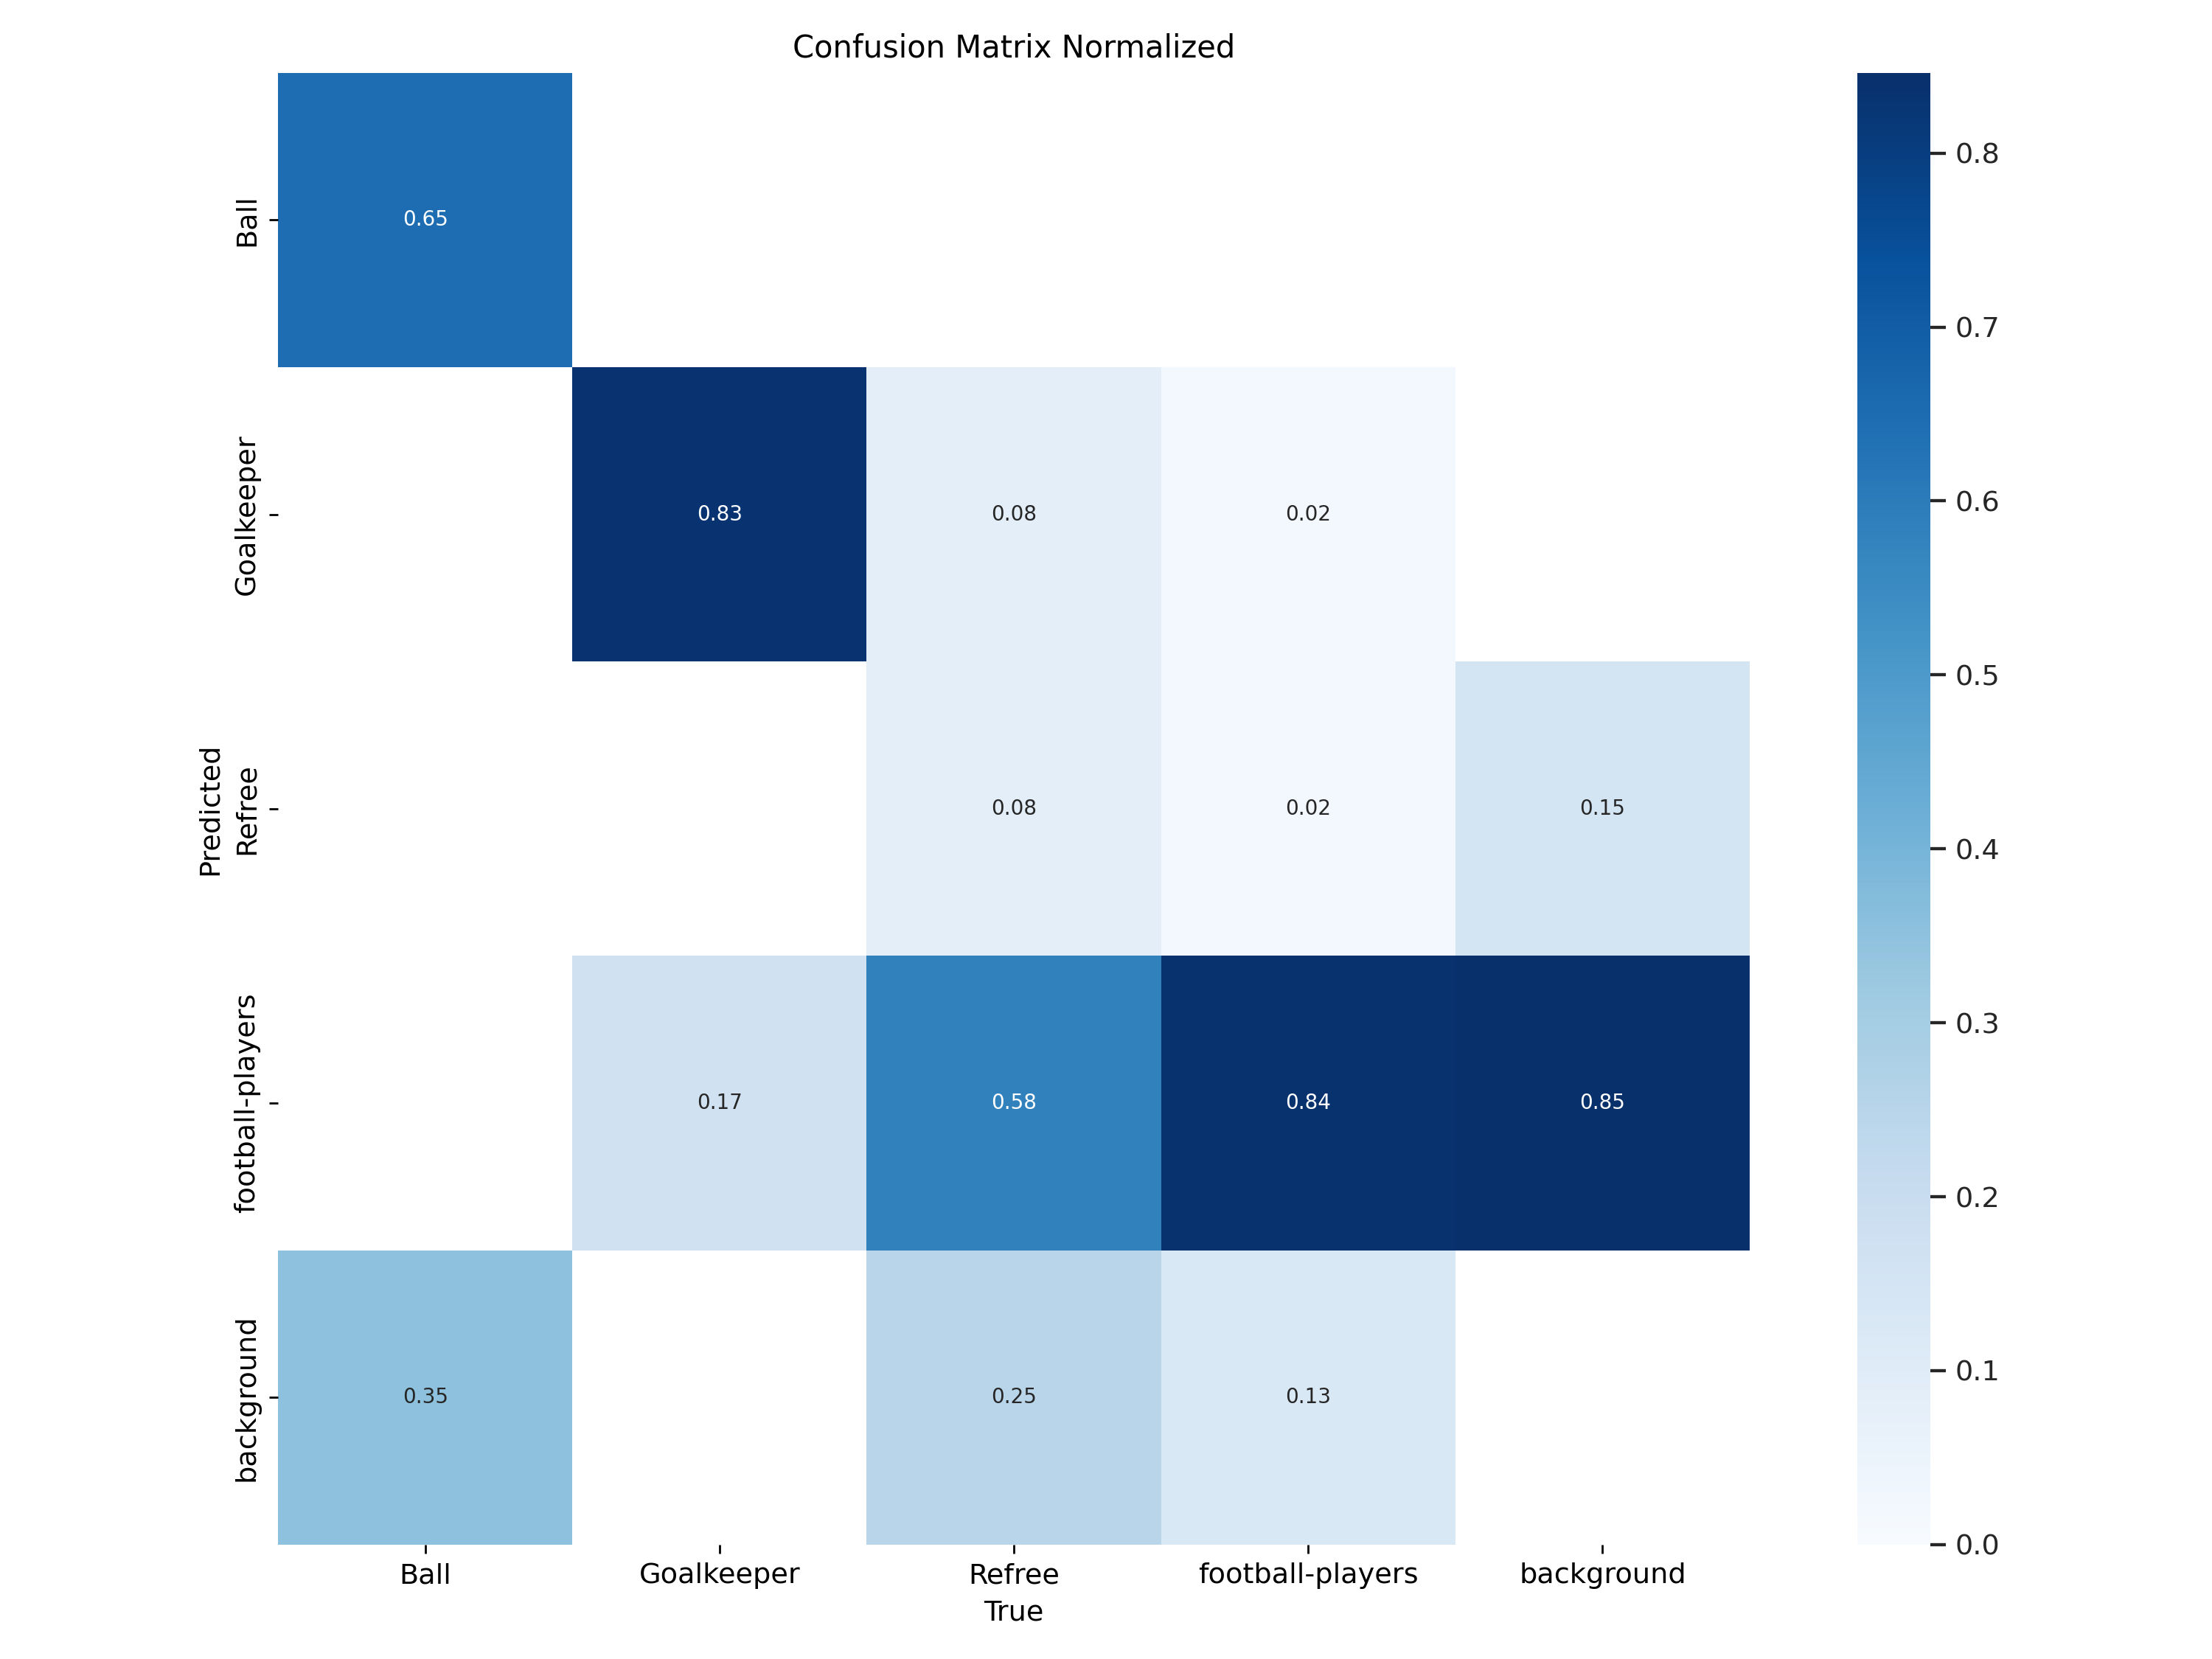

In [13]:
#Plotting confusion matrix to see the performance
from IPython.display import Image,display
Image('/content/drive/MyDrive/YOLO-football/runs/detect/train/confusion_matrix_normalized.png', width = 600)

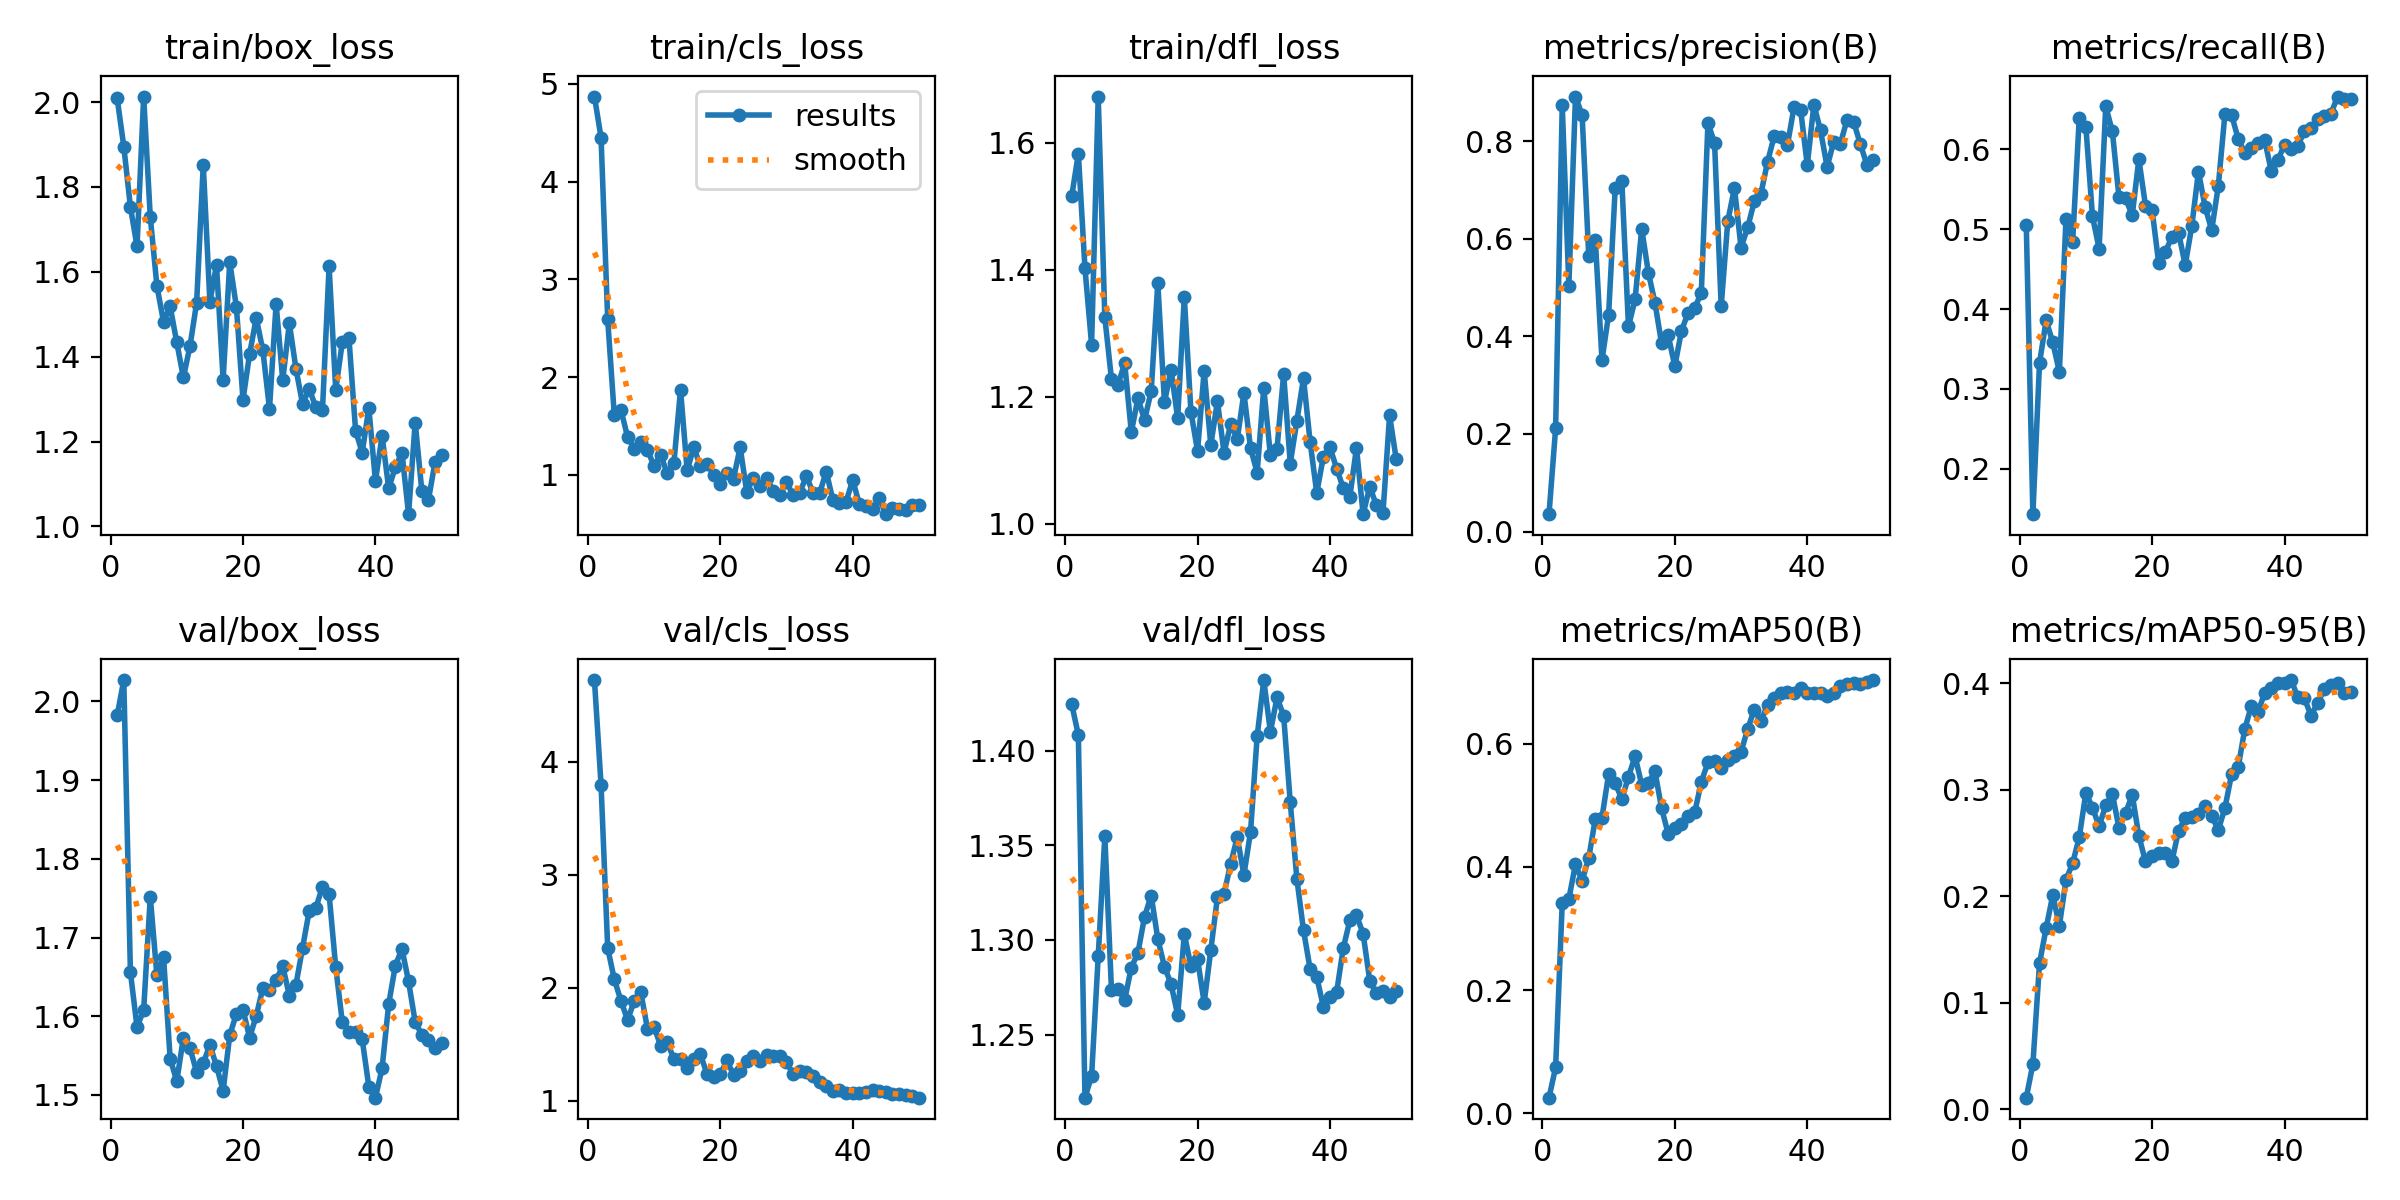

In [19]:
Image('/content/drive/MyDrive/YOLO-football/runs/detect/train/results.png') #Performance analysis

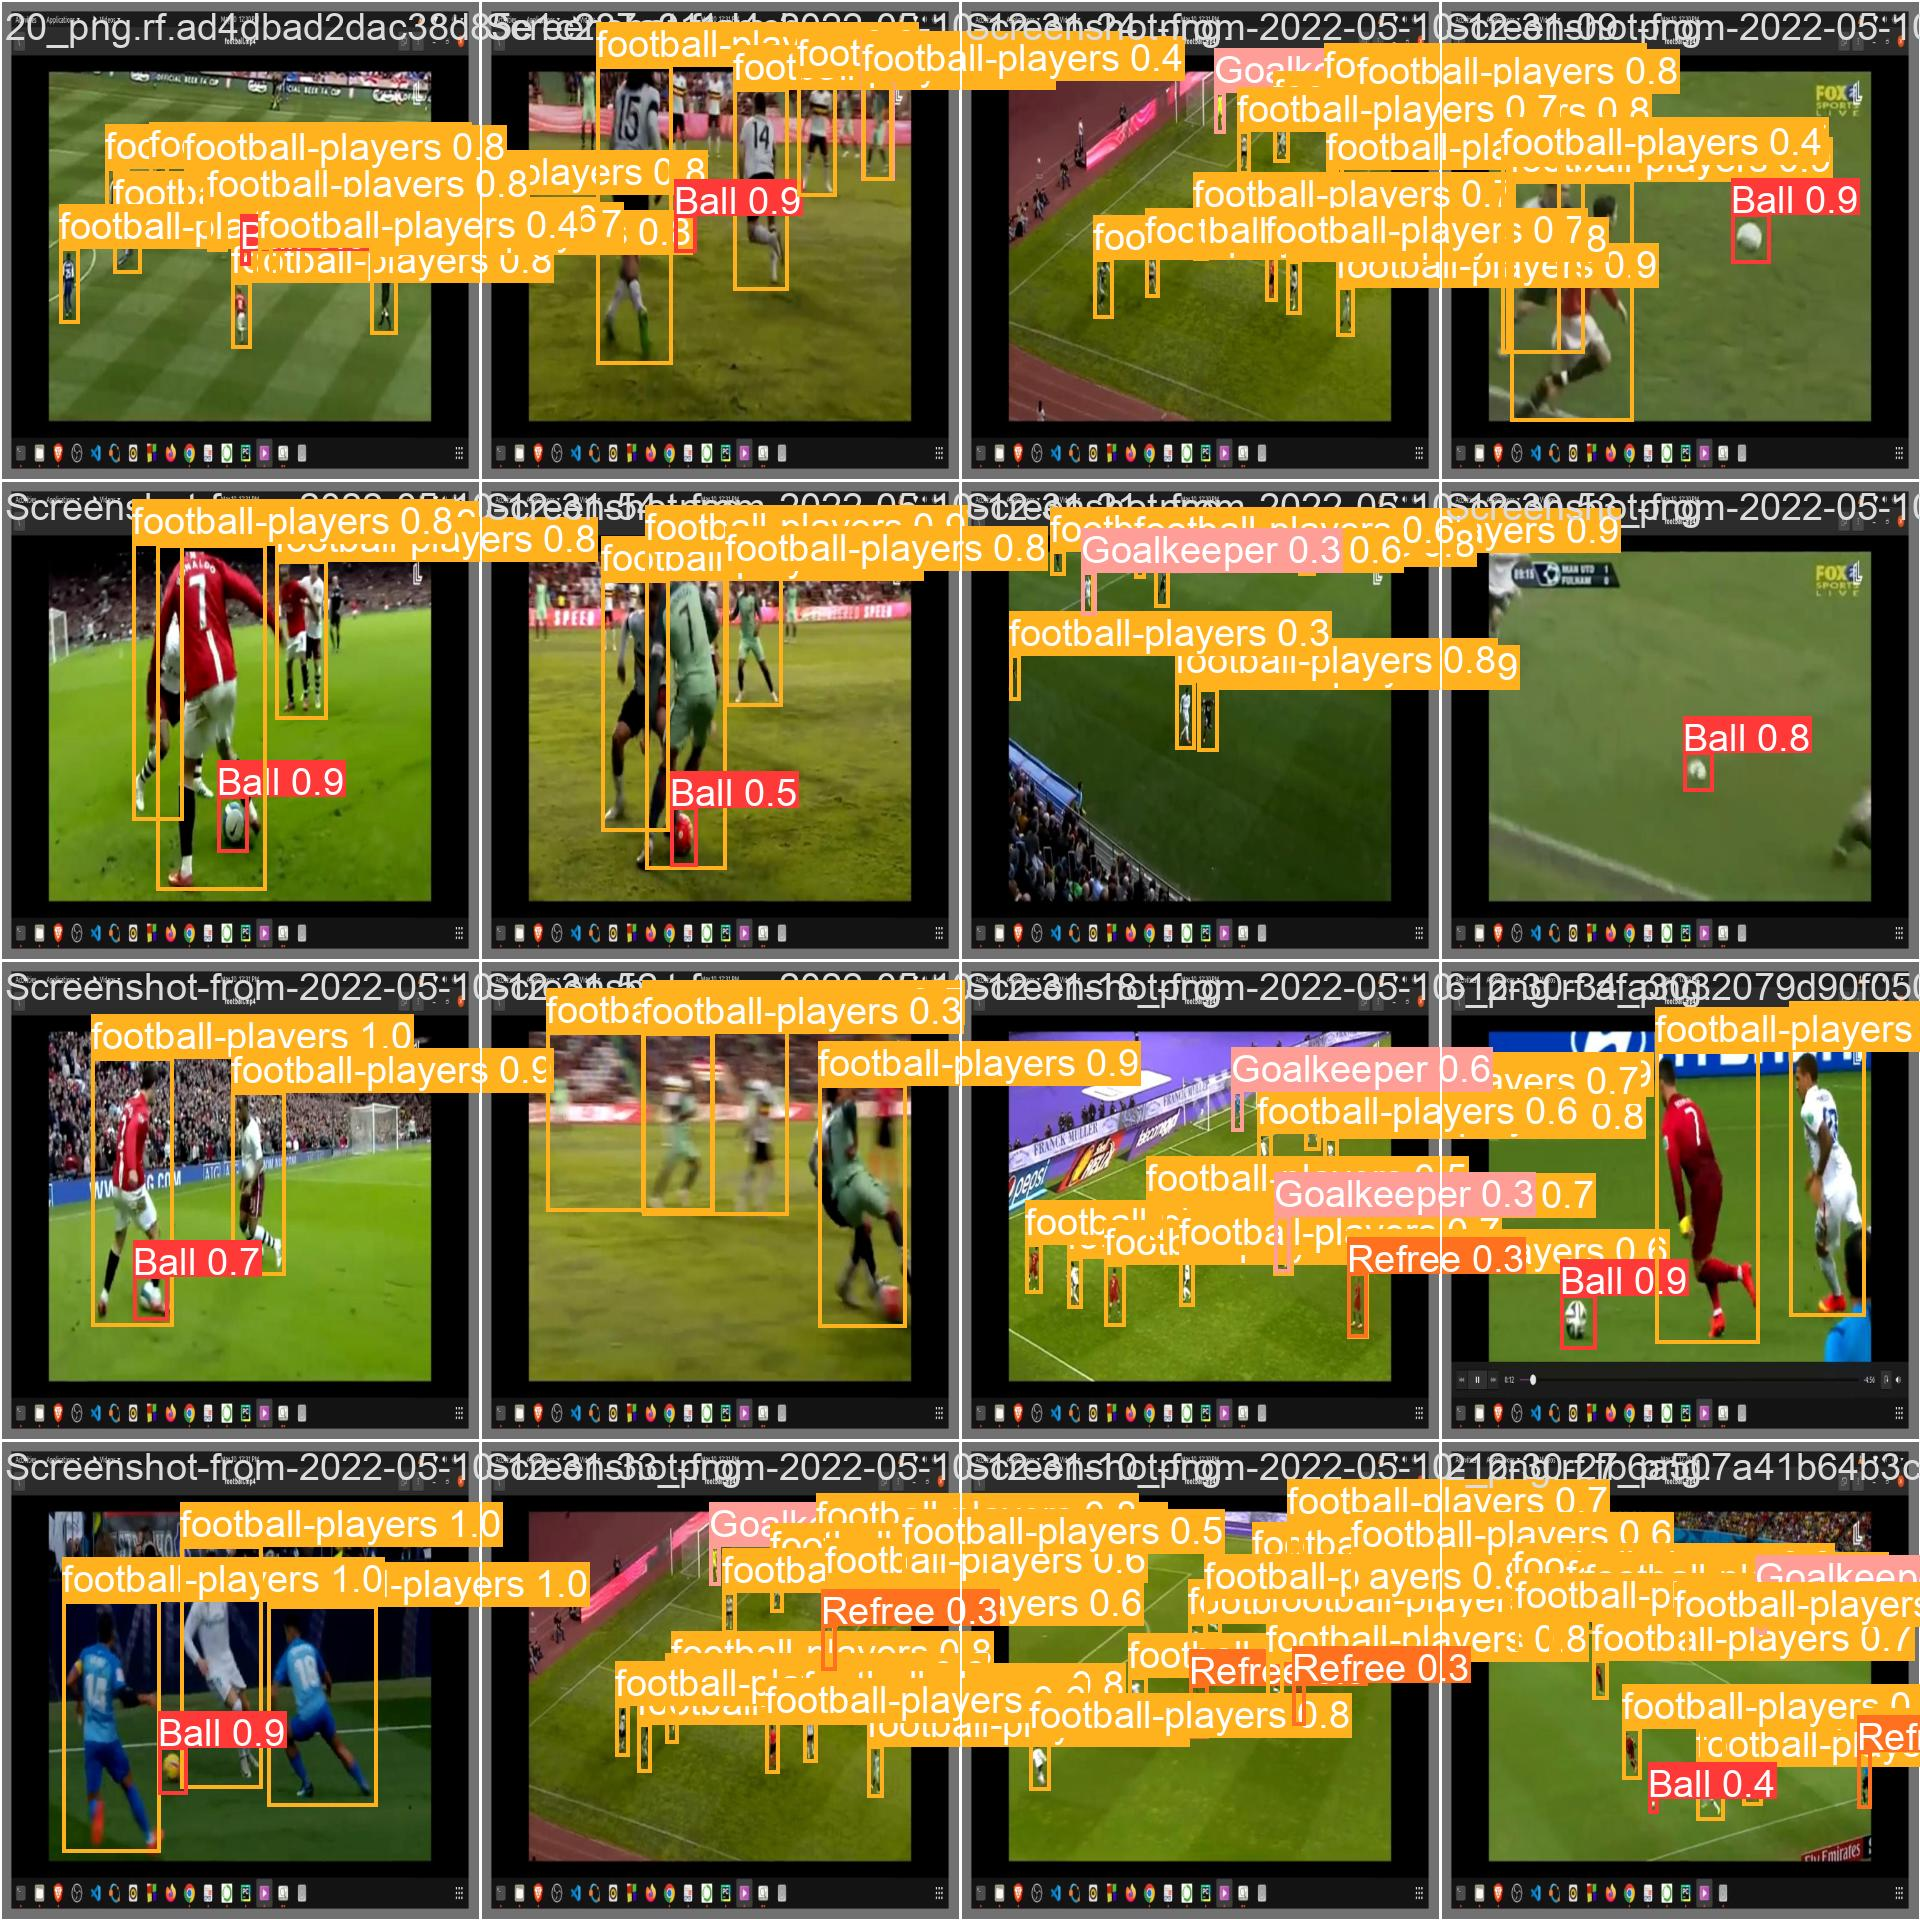

In [20]:
Image('/content/drive/MyDrive/YOLO-football/runs/detect/train/val_batch0_pred.jpg')

In [21]:
##Validating custom model

!yolo task=detect mode=val model=/content/drive/MyDrive/YOLO-football/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.1.36 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/YOLO-football/datasets/Football-players-detection-1/valid/labels.cache... 18 images, 0 backgrounds, 0 corrupt: 100% 18/18 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.03it/s]
                   all         18        152      0.875      0.601       0.68      0.398
                  Ball         18         17      0.902      0.588      0.727      0.386
            Goalkeeper         18          6      0.733      0.833      0.793      0.493
                Refree         18         12          1      0.153      0.317       0.21
      football-players         18        117      0.864      0.829      0.885      0.503
Speed: 0.3ms preprocess, 40.3ms inference, 0.0ms loss, 35.1ms postprocess per image
Res

In [22]:
##Inference with custom model

!yolo task=detect mode=predict model=/content/drive/MyDrive/YOLO-football/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.1.36 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

image 1/7 /content/drive/MyDrive/YOLO-football/datasets/Football-players-detection-1/test/images/16_png.rf.f2f3da5b36beea4cad379a24a8318d80.jpg: 640x640 2 Refrees, 8 football-playerss, 22.9ms
image 2/7 /content/drive/MyDrive/YOLO-football/datasets/Football-players-detection-1/test/images/4_png.rf.8dc26cf7ff7f3c2033cead696e2504e1.jpg: 640x640 1 Ball, 1 Refree, 15 football-playerss, 17.5ms
image 3/7 /content/drive/MyDrive/YOLO-football/datasets/Football-players-detection-1/test/images/8_png.rf.35b78659e9e7ff505f7ebf8aef7b3a3b.jpg: 640x640 1 Ball, 4 football-playerss, 16.3ms
image 4/7 /content/drive/MyDrive/YOLO-football/datasets/Football-players-detection-1/test/images/Screenshot-from-2022-05-10-12-30-10_png.rf.d7946ca78222515c3076102072dacaea.jpg: 640x640 1 Ball, 5 football-playerss, 16.4ms
image 5/7 /content/drive/MyDri

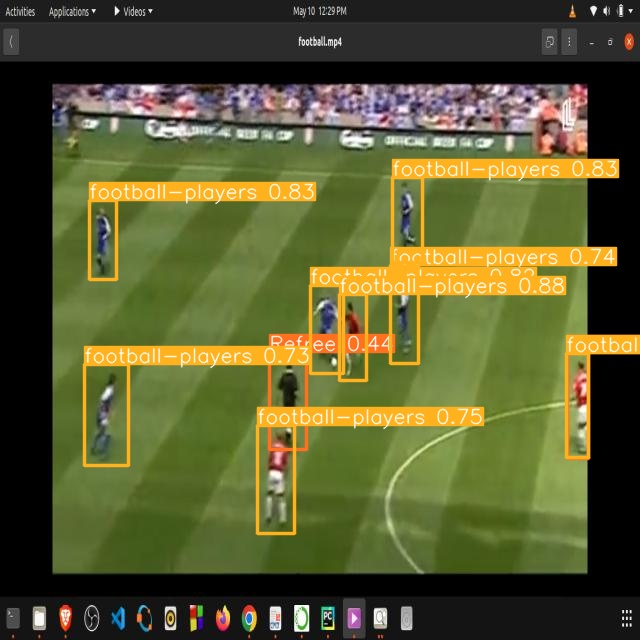

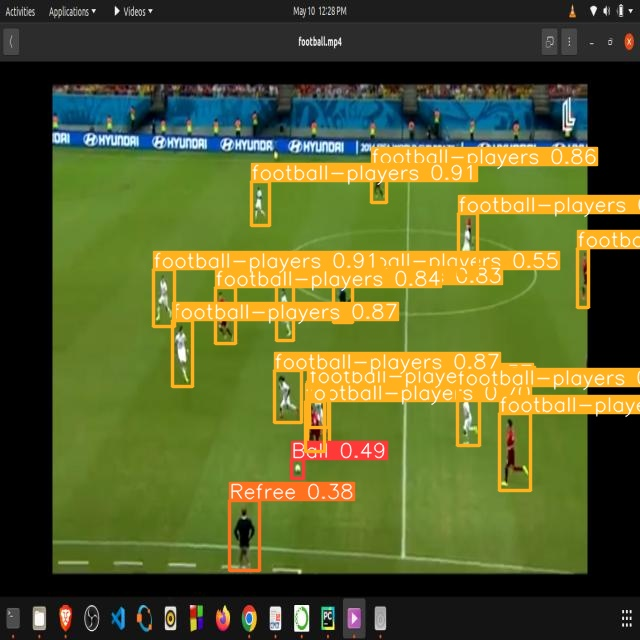

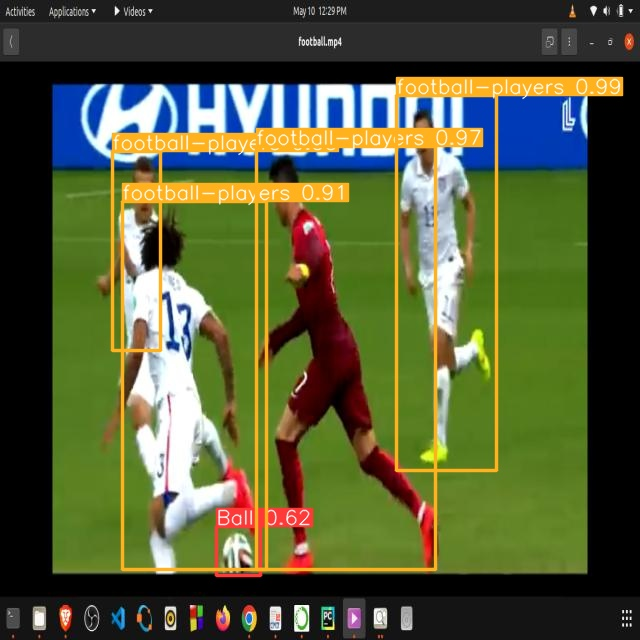

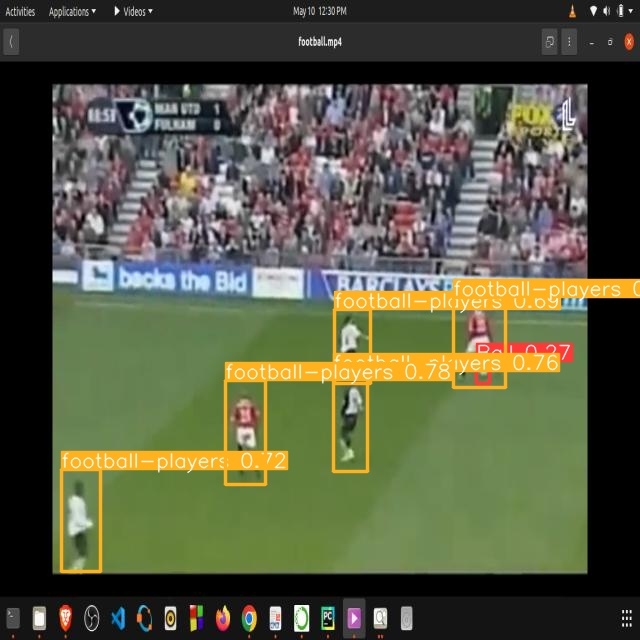

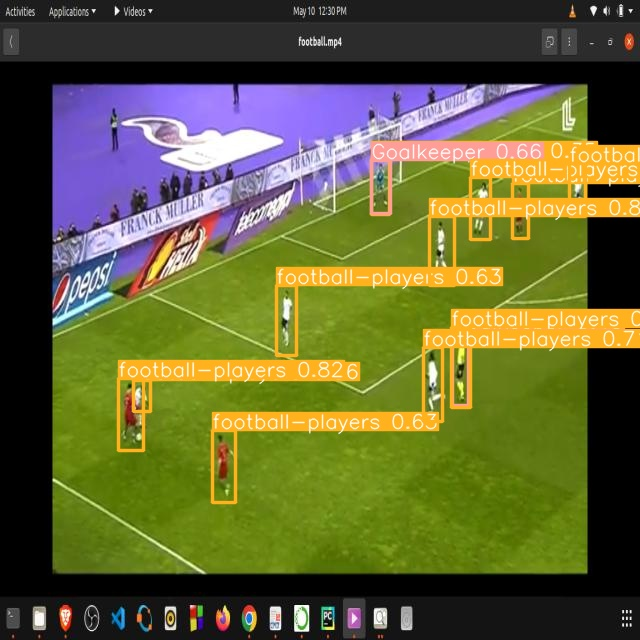

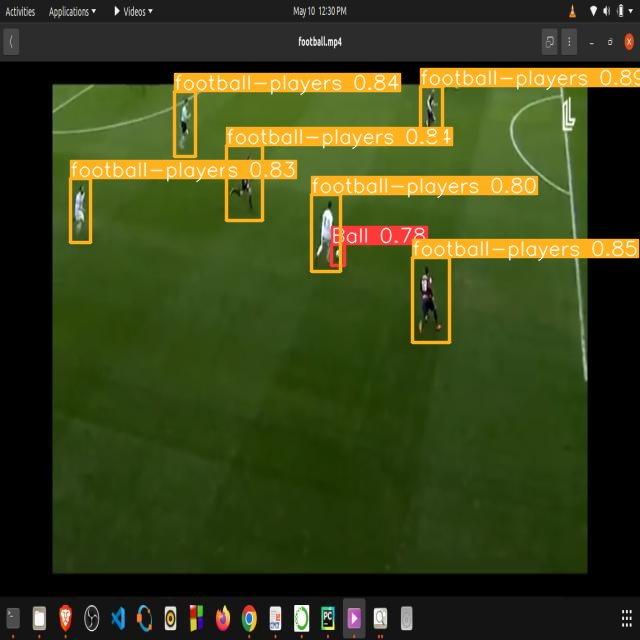

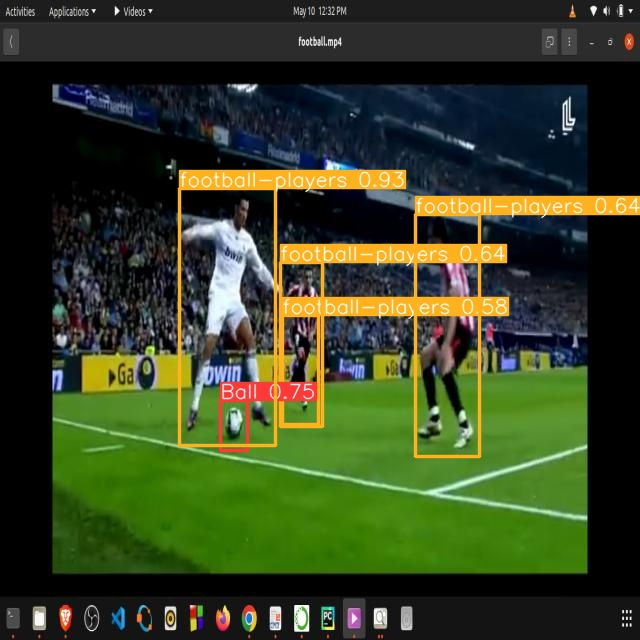

In [23]:
import os
for image in os.listdir('/content/drive/MyDrive/YOLO-football/runs/detect/predict'):
  image_path = os.path.join('/content/drive/MyDrive/YOLO-football/runs/detect/predict', image)
  display(Image(image_path))
  print("\n")


In [24]:
#Another method to display images
# import glob
# from IPython.display import Image, display

# for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
#       display(Image(filename=image_path, width=600))
#       print("\n")

In [25]:
# Testing on a sample video
!yolo task=detect mode=predict model=/content/drive/MyDrive/YOLO-football/runs/detect/train/weights/best.pt conf=0.25 source='/content/drive/MyDrive/YOLO-football/football.mp4' save = True

Streaming output truncated to the last 5000 lines.
video 1/1 (frame 2705/7701) /content/drive/MyDrive/YOLO-football/football.mp4: 384x640 2 Goalkeepers, 14 football-playerss, 6.7ms
video 1/1 (frame 2706/7701) /content/drive/MyDrive/YOLO-football/football.mp4: 384x640 1 Goalkeeper, 15 football-playerss, 6.8ms
video 1/1 (frame 2707/7701) /content/drive/MyDrive/YOLO-football/football.mp4: 384x640 1 Goalkeeper, 14 football-playerss, 6.8ms
video 1/1 (frame 2708/7701) /content/drive/MyDrive/YOLO-football/football.mp4: 384x640 1 Goalkeeper, 14 football-playerss, 7.4ms
video 1/1 (frame 2709/7701) /content/drive/MyDrive/YOLO-football/football.mp4: 384x640 1 Goalkeeper, 15 football-playerss, 6.7ms
video 1/1 (frame 2710/7701) /content/drive/MyDrive/YOLO-football/football.mp4: 384x640 1 Goalkeeper, 15 football-playerss, 7.6ms
video 1/1 (frame 2711/7701) /content/drive/MyDrive/YOLO-football/football.mp4: 384x640 1 Goalkeeper, 15 football-playerss, 6.8ms
video 1/1 (frame 2712/7701) /content/drive/My

In [33]:
# Testing on a sample video 2-yt
!yolo task=detect mode=predict model=/content/drive/MyDrive/YOLO-football/runs/detect/train/weights/best.pt conf=0.25 source='/content/drive/MyDrive/YOLO-football/football-yt.mp4' save = True

Streaming output truncated to the last 5000 lines.
video 1/1 (frame 4714/9710) /content/drive/MyDrive/YOLO-football/football-yt.mp4: 384x640 1 Ball, 1 Goalkeeper, 9 football-playerss, 10.7ms
video 1/1 (frame 4715/9710) /content/drive/MyDrive/YOLO-football/football-yt.mp4: 384x640 1 Ball, 1 Goalkeeper, 10 football-playerss, 10.7ms
video 1/1 (frame 4716/9710) /content/drive/MyDrive/YOLO-football/football-yt.mp4: 384x640 1 Goalkeeper, 10 football-playerss, 10.7ms
video 1/1 (frame 4717/9710) /content/drive/MyDrive/YOLO-football/football-yt.mp4: 384x640 1 Goalkeeper, 9 football-playerss, 10.7ms
video 1/1 (frame 4718/9710) /content/drive/MyDrive/YOLO-football/football-yt.mp4: 384x640 2 Goalkeepers, 7 football-playerss, 10.7ms
video 1/1 (frame 4719/9710) /content/drive/MyDrive/YOLO-football/football-yt.mp4: 384x640 3 Goalkeepers, 6 football-playerss, 10.7ms
video 1/1 (frame 4720/9710) /content/drive/MyDrive/YOLO-football/football-yt.mp4: 384x640 1 Goalkeeper, 6 football-playerss, 12.2ms
video

In [27]:
# !ffmpeg -i /content/runs/detect/predict3/football.avi /content/runs/detect/predict3/footballing.mp4 #if want to convert .avi file to mp3

In [28]:
from IPython.display import Video
Video('/content/drive/MyDrive/YOLO-football/runs/detect/predict2/football.avi', width = 800)